In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 单变量线性回归

In [44]:
path='ex1data1.txt';
data=pd.read_csv(path,header=None,names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [45]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


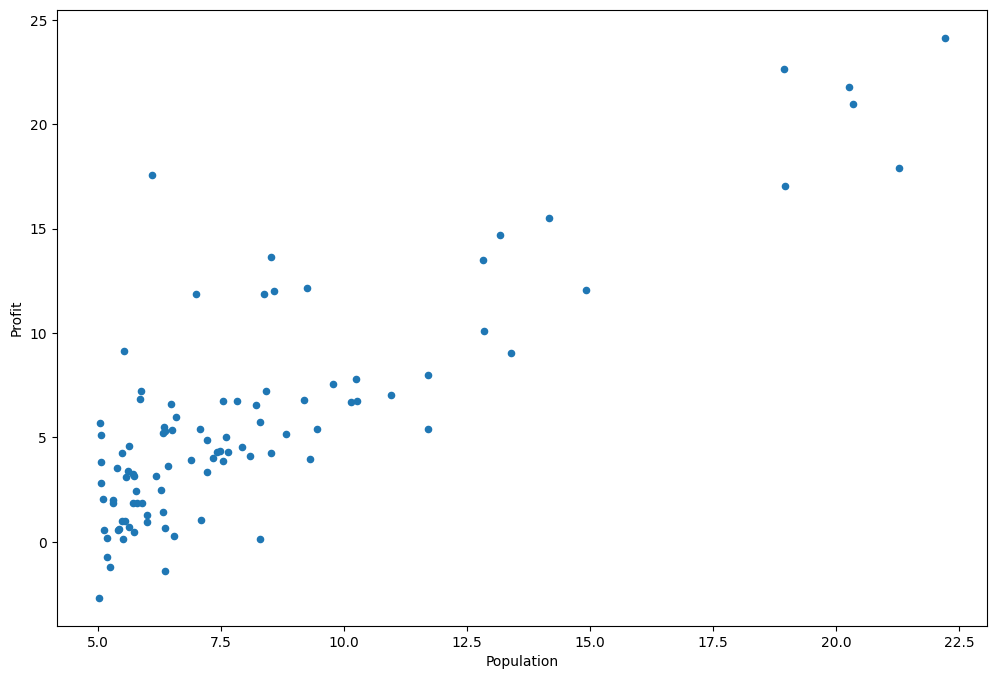

In [46]:
data.plot(kind='scatter',x='Population',y='Profit',figsize=(12,8))
plt.show()

In [47]:
# 创建代价函数
def computeCost(X,y,theta):
    inner=np.power(((X*theta.T)-y),2)
    return np.sum(inner)/(2*len(X))

In [48]:
# 【1,x1;
# 1,x2
# 1,x3
# ...】
# theta:
    # [theta0,theta1]
# 为常数项插入一列
data.insert(0,'One',1)
data.head()

,One,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [49]:
cols=data.shape[1]# 列数
X=data.iloc[:,0:cols-1] #刨去最后一列y
y=data.iloc[:,cols-1:cols]
X.head()
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [50]:
# 转化成矩阵
X=np.matrix(X.values)
y=np.matrix(y.values)
theta=np.matrix(np.array([0,0]))
theta

matrix([[0, 0]])

In [51]:
X.shape,theta.shape,y.shape

((97, 2), (1, 2), (97, 1))

In [52]:
computeCost(X,y,theta)


32.072733877455676

In [17]:
# 梯度下降
def gradientDescent(X,y,theta,alpha,iters):
    temp=np.matrix(np.zeros(theta.shape))
    # 临时生成的theta
    parameters=int(theta.ravel().shape[1])
    # theta.ravel().shape =(1,2)
    cost=np.zeros(iters)
    # 记录每次的损失函数
    for i in range(iters):
        error=(X*(theta.T))-y
        for j in range(parameters):
            # 分别生成theta的各个参数
            d =np.multiply(error,X[:,j])
            # 导数
            temp[0,j]=theta[0,j]-(alpha/(len(X)))*np.sum(d)
        theta=temp
        cost[i]=computeCost(X,y,theta)
    return theta,cost

In [21]:
alpha=0.01
iters=1000
result,cost=gradientDescent(X,y,theta,alpha,iters)
result,cost

(matrix([[-3.24140214,  1.1272942 ]]),
 array([6.73719046, 5.93159357, 5.90115471, 5.89522859, 5.89009494,
        5.88500416, 5.87993248, 5.87487909, 5.86984391, 5.86482687,
        5.85982789, 5.85484692, 5.84988389, 5.84493874, 5.8400114 ,
        5.83510181, 5.8302099 , 5.82533562, 5.82047889, 5.81563965,
        5.81081784, 5.8060134 , 5.80122627, 5.79645638, 5.79170367,
        5.78696808, 5.78224955, 5.77754801, 5.77286341, 5.76819568,
        5.76354477, 5.75891061, 5.75429313, 5.7496923 , 5.74510803,
        5.74054027, 5.73598897, 5.73145406, 5.72693549, 5.72243319,
        5.71794711, 5.71347718, 5.70902336, 5.70458558, 5.70016379,
        5.69575792, 5.69136792, 5.68699373, 5.6826353 , 5.67829257,
        5.67396548, 5.66965398, 5.665358  , 5.6610775 , 5.65681242,
        5.6525627 , 5.64832829, 5.64410913, 5.63990517, 5.63571635,
        5.63154261, 5.62738391, 5.6232402 , 5.6191114 , 5.61499748,
        5.61089837, 5.60681403, 5.60274441, 5.59868944, 5.59464907,
        5

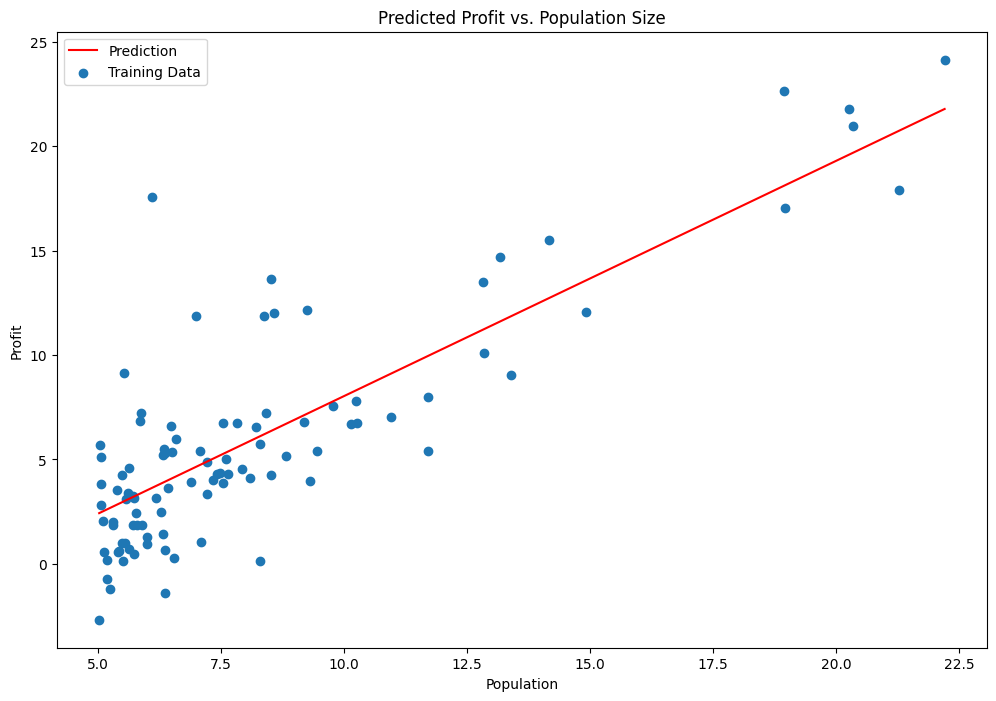

In [23]:
x=np.linspace(data.Population.min(),data.Population.max(),100)
f=result[0,0]+result[0,1]*x

fig,ax=plt.subplots(figsize=(12,8))
ax.plot(x,f,'r',label="Prediction")
ax.scatter(data.Population,data.Profit,label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

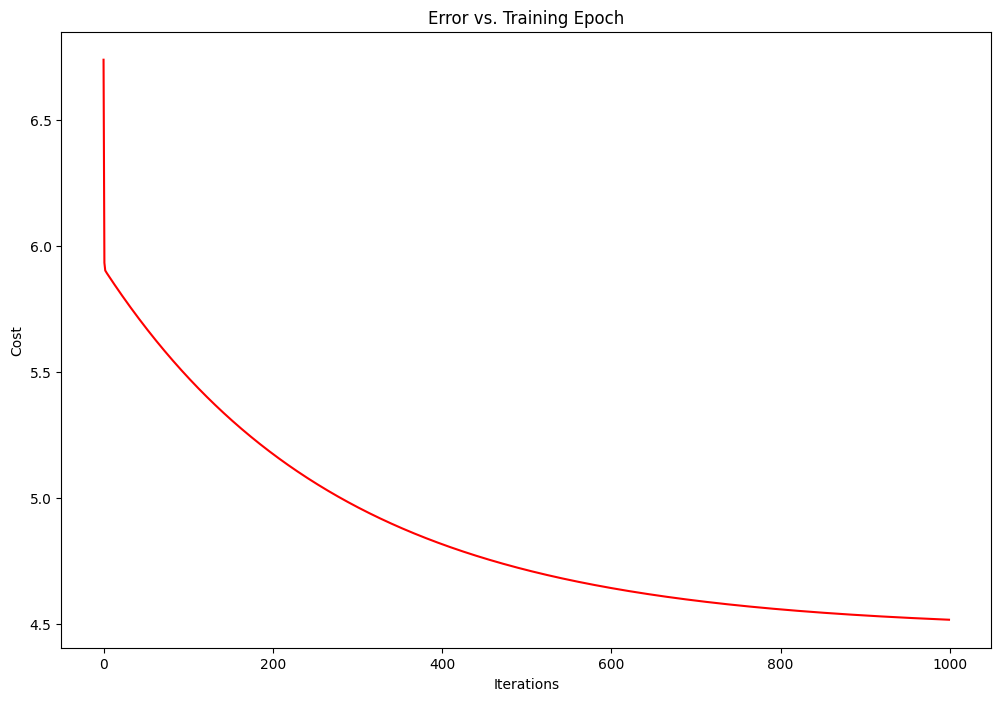

In [24]:
# 代价变化
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [ ]:
m=np.matrix(np.array([[1,2],[2,2]]))
m.ravel().shape

# 多变量线性回归

In [27]:
path="ex1data2.txt"
data1=pd.read_csv(path,header=None,names=["Size","NumberOfRoom","Price"])
data1.head()

,Size,NumberOfRoom,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [28]:
#由于Size和NumberOfRoom相差巨大，增加归一化的过程
data1=(data1-data1.mean())/data.std()
data1.head()

,Size,NumberOfRoom,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [30]:
data1.insert(0,'One',1)
cols=data1.shape[1]
X1=data1.iloc[:,0:cols-1]
y1=data1.iloc[:,cols-1:cols]

In [31]:
X1,y1

(    One      Size  NumberOfRoom
 0     1  0.130010     -0.223675
 1     1 -0.504190     -0.223675
 2     1  0.502476     -0.223675
 3     1 -0.735723     -1.537767
 4     1  1.257476      1.090417
 5     1 -0.019732      1.090417
 6     1 -0.587240     -0.223675
 7     1 -0.721881     -0.223675
 8     1 -0.781023     -0.223675
 9     1 -0.637573     -0.223675
 10    1 -0.076357      1.090417
 11    1 -0.000857     -0.223675
 12    1 -0.139273     -0.223675
 13    1  3.117292      2.404508
 14    1 -0.921956     -0.223675
 15    1  0.376643      1.090417
 16    1 -0.856523     -1.537767
 17    1 -0.962223     -0.223675
 18    1  0.765468      1.090417
 19    1  1.296484      1.090417
 20    1 -0.294048     -0.223675
 21    1 -0.141790     -1.537767
 22    1 -0.499157     -0.223675
 23    1 -0.048673      1.090417
 24    1  2.377392     -0.223675
 25    1 -1.133356     -0.223675
 26    1 -0.682873     -0.223675
 27    1  0.661026     -0.223675
 28    1  0.250810     -0.223675
 29    1  

In [32]:
X1=np.matrix(X1.values)
y1=np.matrix(y1.values)
theta1=np.matrix(np.array([0,0,0]))
X1,y1,theta1

(matrix([[ 1.00000000e+00,  1.30009869e-01, -2.23675187e-01],
         [ 1.00000000e+00, -5.04189838e-01, -2.23675187e-01],
         [ 1.00000000e+00,  5.02476364e-01, -2.23675187e-01],
         [ 1.00000000e+00, -7.35723065e-01, -1.53776691e+00],
         [ 1.00000000e+00,  1.25747602e+00,  1.09041654e+00],
         [ 1.00000000e+00, -1.97317285e-02,  1.09041654e+00],
         [ 1.00000000e+00, -5.87239800e-01, -2.23675187e-01],
         [ 1.00000000e+00, -7.21881404e-01, -2.23675187e-01],
         [ 1.00000000e+00, -7.81023044e-01, -2.23675187e-01],
         [ 1.00000000e+00, -6.37573110e-01, -2.23675187e-01],
         [ 1.00000000e+00, -7.63567023e-02,  1.09041654e+00],
         [ 1.00000000e+00, -8.56737193e-04, -2.23675187e-01],
         [ 1.00000000e+00, -1.39273340e-01, -2.23675187e-01],
         [ 1.00000000e+00,  3.11729182e+00,  2.40450826e+00],
         [ 1.00000000e+00, -9.21956312e-01, -2.23675187e-01],
         [ 1.00000000e+00,  3.76643089e-01,  1.09041654e+00],
        

In [34]:
result1,cost2=gradientDescent(X1,y1,theta1,alpha,iters)
computeCost(X1,y1,result1)

0.13070336960771892

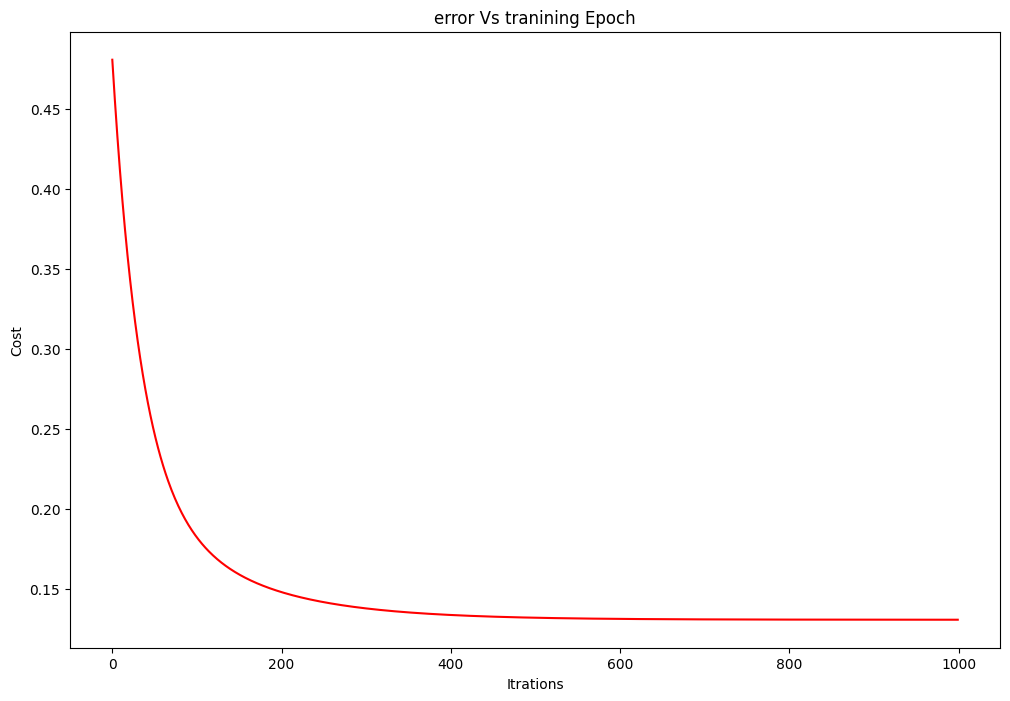

In [35]:
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost2,'r')
ax.set_xlabel('Itrations')
ax.set_ylabel('Cost')
ax.set_title('error Vs tranining Epoch')
plt.show()

# 使用sklearn预测

In [36]:
from sklearn import linear_model
model=linear_model.LinearRegression()
model.fit(X,y)

d:\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
d:\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LinearRegression()

d:\pycharmprojects\pythonproject\venv\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


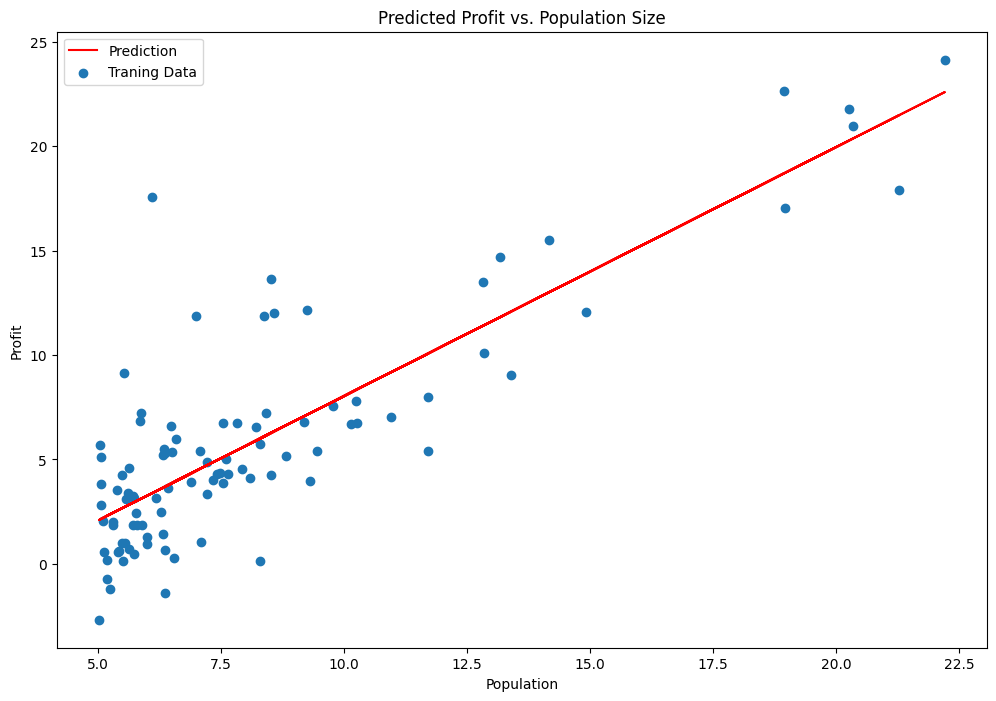

In [53]:
x=np.array(X[:,1].A1)
# np.flatten()_np.flanten_Muasci的博客-CSDN博客
f=model.predict(X).flatten() # 返回扁平的ndarray

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()